# Notebook for simulating, saving and analysing MOMA-like data for a parameter range

In [38]:
from cells_simulation import *


In [42]:
def write_csv_config(filename):
    with open(filename, "w") as fin:
        fin.write("# Generated config file for simulated data\n")
        fin.write("time_col = time_min  \n")
        fin.write("length_col = log_length_noise \n")
        fin.write("length_islog = true \n")
        fin.write("fp_col = gfp_noise \n")
        fin.write("parent_tags = lane, parent_id \n")
        fin.write("cell_tags = lane, cell_id \n")
        fin.write("rescale_time = 1 \n")

In [43]:
# ========== Simulation parameters ========== #
save_dataset = True    # saves data set as csv
run_ggp = True         # runs the ggp code (located in "../bin/" relative to this nb)

dt = 1e-3
dt_measument = 3 # in minutes
n_cells = 1 # number of cells that will be simulated

div_mode = "timer"

division_log_length = 1+np.log(2)   # for sizer: division, when log_length hits division_log_length
division_time = 600          # for timer: division, when cell cycle time hits division_time
division_addition = np.log(2)       # for adder: divsion, when division_addition in log_length was added in cell cycle


# ========== Model parameters ========== #
parameter_set = {   "mean_lambda": 1e-8, 
                    "gamma_lambda": 0.01,
                    "var_lambda": 1e-8,
                    "mean_q": 10,
                    "gamma_q": 1e-2,
                    "var_q": 0.1,
                    "beta": 1e-3,
                    "var_x": 1e-3, # 1e-3,
                    "var_g": 5000, # 5000,
                    "var_dx": 0.001,
                    "var_dg": 500}

# --------- SIMULATE --------- #
data_dfs=[]
for i in range(5):
    cells_simulated = simulate_cells(dt, n_cells, parameter_set, div_mode,
                            division_log_length, 
                            division_time, 
                            division_addition)

    data_df = build_data_set(cells_simulated, parameter_set['var_x'], parameter_set['var_g'], int(dt_measument/dt))
    data_df["lane"]=i
    data_dfs.append(data_df)

| ==================== | Progress 100%  No of cells:  1
Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1
Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1
Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1
Every 3000 th datapoint is saved
| ==================== | Progress 100%  No of cells:  1
Every 3000 th datapoint is saved


In [44]:
dataset = pd.concat(data_dfs, sort=False)

In [45]:
dataset

,cell_id,time_min,parent_id,log_length,gfp,lt,qt,log_length_noise,gfp_noise,lane
0,0,0.0,-1,1.000000,3.000000e+09,1.000000e-08,10.000000,0.983244,3.000000e+09,0
1,0,3.0,-1,0.999890,2.991014e+09,-9.861324e-05,8.905161,1.033019,2.991014e+09,0
2,0,6.0,-1,0.999505,2.982054e+09,-3.163877e-05,9.087974,1.003647,2.982054e+09,0
3,0,9.0,-1,0.999640,2.973121e+09,-1.892079e-05,9.116527,1.040126,2.973121e+09,0
4,0,12.0,-1,0.998991,2.964215e+09,-2.973949e-04,8.378840,0.997921,2.964215e+09,0
...,...,...,...,...,...,...,...,...,...,...
196,0,588.0,-1,0.716012,1.666321e+09,-8.896014e-04,5.844196,0.729547,1.666321e+09,4
197,0,591.0,-1,0.713529,1.661330e+09,-5.157684e-04,5.990937,0.691074,1.661330e+09,4
198,0,594.0,-1,0.712402,1.656353e+09,-3.720547e-04,6.552142,0.695266,1.656353e+09,4
199,0,597.0,-1,0.711259,1.651392e+09,-3.555452e-04,6.719393,0.650848,1.651392e+09,4


In [46]:
# out_dir = mk_mising_dir('../data/test_new_init')
out_dir = mk_mising_dir('../data/stalled_n{:d}_{:s}'.format(n_cells, div_mode))

# ----------- SAVE ----------- #
if save_dataset:
    directory, filename = get_next_file_name(out_dir)

    write_param_file(os.path.join(directory, "parameters.txt"), parameter_set, {"var_dg" : ["free"]}) 

    write_csv_config(os.path.join(directory, "csv_config.txt"))
    dataset.to_csv(filename)
    print("New simulation saved in", filename)

    # ----------- RUN ----------- #
    if run_ggp:
        run_cmd = suggest_run_command(directory, filename, modes="-m -p")
        print("run: -> \n", run_cmd)
        s = subprocess.run(run_cmd, capture_output=False, shell=True)
        print(s)

None
New simulation saved in ../data/stalled_n1_timer/stalled_n1_timer_0/stalled_n1_timer_0.csv
run: -> 
 ../bin/gfp_gaussian -c ../data/stalled_n1_timer/stalled_n1_timer_0/csv_config.txt -b ../data/stalled_n1_timer/stalled_n1_timer_0/parameters.txt -r 1e-12  -i ../data/stalled_n1_timer/stalled_n1_timer_0/stalled_n1_timer_0.csv -l 0 -m -p
CompletedProcess(args='../bin/gfp_gaussian -c ../data/stalled_n1_timer/stalled_n1_timer_0/csv_config.txt -b ../data/stalled_n1_timer/stalled_n1_timer_0/parameters.txt -r 1e-12  -i ../data/stalled_n1_timer/stalled_n1_timer_0/stalled_n1_timer_0.csv -l 0 -m -p', returncode=0)


In [47]:

# =============== PLOT =============== #
def plot_cells(cells, n_steps=1):
    _, axes = plt.subplots(2, figsize=(5,4))
    ax = axes.ravel()

    for j in range(len(cells[::n_steps])):
        cell = copy.deepcopy(cells[j])
        cell.time = np.array(cell.time)

        if n_steps>1:
            ax[0].set_title("log length (showing every {:d}th cell)".format(n_steps))
            ax[1].set_title("gfp (showing every {:d}th cell)".format(n_steps))

        else:
            ax[0].set_title("log length")
            ax[1].set_title("gfp")

        # ax[0].set_ylim([1.2, 2.2])
        
        if len(cells[::n_steps]) <20:
            ax[0].axvline(cell.time[-1], ls='--', color='tab:blue')
            ax[1].axvline(cell.time[-1], ls='--', color='tab:orange')

        if j ==0:
            ax[0].plot(cell.time, np.array(cell.log_length), label='log length', color='tab:blue')
            ax[1].plot(cell.time, np.array(cell.gfp), color='tab:orange', label='gfp')

        else:
            ax[0].plot(cell.time, np.array(cell.log_length), color='tab:blue')
            ax[1].plot(cell.time, np.array(cell.gfp), color='tab:orange')

    for j in range(2):
        ax[j].legend()
    plt.tight_layout()
    plt.show()


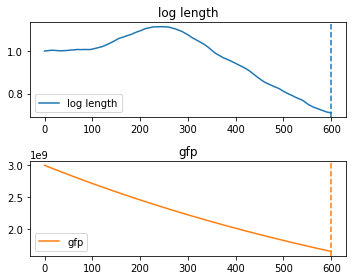

In [48]:
plot_cells(cells_simulated[:5], n_steps=1)

In [49]:
cell_sparse = df2cells(dataset)

In [50]:

# =============== PLOT =============== #
def plot_cells_scatter(cells, n_steps=1):
    _, axes = plt.subplots(2, figsize=(5,4))
    ax = axes.ravel()

    for j in range(len(cells[::n_steps])):
        cell = copy.deepcopy(cells[j])
        cell.time = np.array(cell.time)

        if n_steps>1:
            ax[0].set_title("log length (showing every {:d}th cell)".format(n_steps))
            ax[1].set_title("gfp (showing every {:d}th cell)".format(n_steps))

        else:
            ax[0].set_title("log length")
            ax[1].set_title("gfp")

        # ax[0].set_ylim([1.2, 2.2])
        s=2
        if j ==0:
            ax[0].scatter(cell.time, np.array(cell.log_length), label='log length', color='tab:blue',s=s)
            ax[1].scatter(cell.time, np.array(cell.gfp), color='tab:orange', label='gfp',s=s)

        else:
            ax[0].scatter(cell.time, np.array(cell.log_length), color='tab:blue', s=s)
            ax[1].scatter(cell.time, np.array(cell.gfp), color='tab:orange', s=s)

    for j in range(2):
        ax[j].legend()
    plt.tight_layout()

    plt.show()

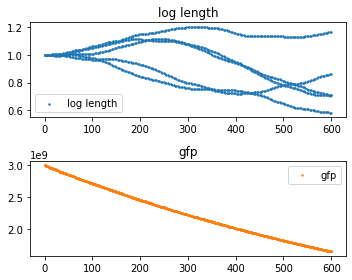

In [51]:
plot_cells_scatter(cell_sparse[:5], n_steps=1)
